In [1]:
from sklearn.datasets import load_diabetes
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = load_diabetes()
df = pd.DataFrame(data.data , columns=data.feature_names)
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


In [4]:
data.feature_names

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

In [5]:
X = df.drop('age', axis=1)
y = df['age']

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

X_train.shape , X_test.shape

((309, 9), (133, 9))

In [8]:
X_train.corr()

,sex,bmi,bp,s1,s2,s3,s4,s5,s6
sex,1.000000,0.044746,0.165128,0.033717,0.128023,-0.344052,0.320619,0.121299,0.159936
bmi,0.044746,1.000000,0.384534,0.246802,0.255519,-0.372335,0.431946,0.448657,0.394699
bp,0.165128,0.384534,1.000000,0.242052,0.164355,-0.113747,0.209316,0.362476,0.376421
s1,0.033717,0.246802,0.242052,1.000000,0.891476,0.044128,0.556987,0.528922,0.323666
s2,0.128023,0.255519,0.164355,0.891476,1.000000,-0.190767,0.653120,0.307541,0.298647
s3,-0.344052,-0.372335,-0.113747,0.044128,-0.190767,1.000000,-0.732862,-0.388778,-0.304091
s4,0.320619,0.431946,0.209316,0.556987,0.653120,-0.732862,1.000000,0.629707,0.441489
s5,0.121299,0.448657,0.362476,0.528922,0.307541,-0.388778,0.629707,1.000000,0.464878
s6,0.159936,0.394699,0.376421,0.323666,0.298647,-0.304091,0.441489,0.464878,1.000000


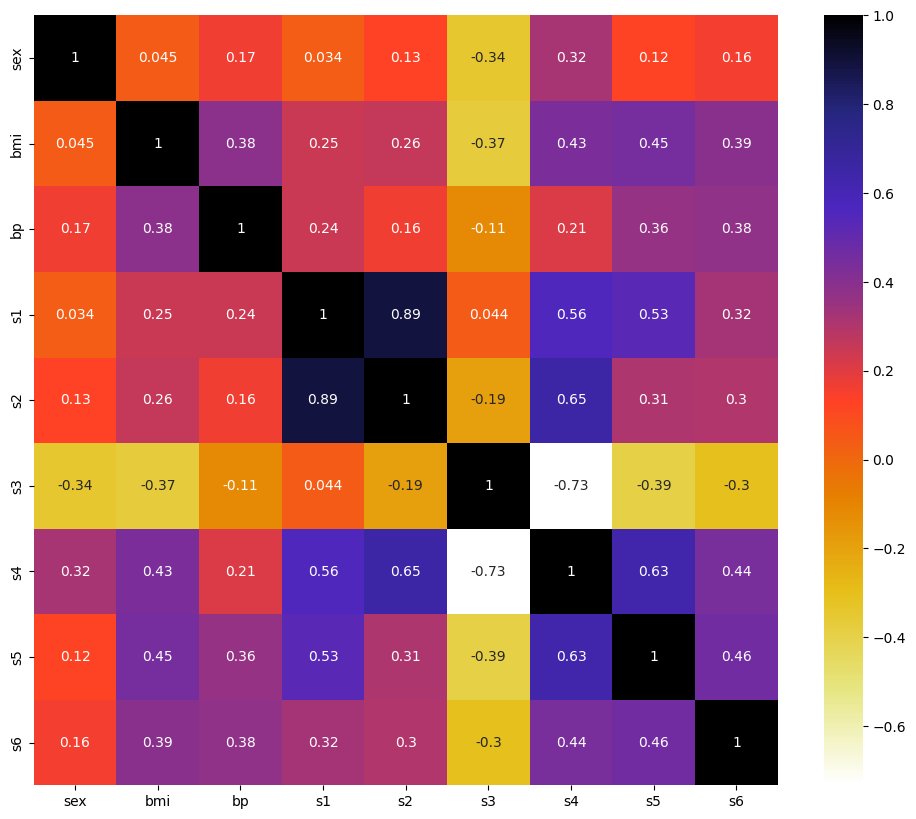

In [11]:
plt.figure(figsize=(12,10))
cor = X_train.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

In [12]:
# With the following function we can select highly correlated features
# It will remove the first feature that is correlated with any other feature above the threshold

def correlation(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()

    for i in range (len(corr_matrix.columns)):
        for j in range(i):

            if abs(corr_matrix.iloc[i,j]) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    
    return col_corr

In [ ]:
corr_features = correlation(X_train, 0.7)
corr_features

2

In [16]:
X_train.drop(corr_features, axis=1)
X_test.drop(corr_features, axis=1)

,sex,bmi,bp,s1,s3,s5,s6
287,-0.044642,-0.006206,-0.015999,0.125019,0.019187,0.032432,-0.005220
211,-0.044642,0.036907,0.021872,-0.024960,0.000779,-0.022517,-0.021788
72,0.050680,-0.004050,-0.012556,0.103003,0.056003,0.084492,-0.017646
321,-0.044642,0.051996,0.079265,0.054845,-0.076536,0.098648,0.061054
73,0.050680,-0.020218,-0.002228,0.038334,-0.006584,-0.005142,-0.009362
...,...,...,...,...,...,...,...
238,0.050680,-0.009439,0.059744,-0.035968,-0.076536,0.011011,-0.021788
26,-0.044642,-0.077342,-0.026328,-0.089630,0.026550,-0.042571,-0.005220
7,0.050680,-0.001895,0.066629,0.090620,0.022869,-0.035816,0.003064
401,-0.044642,-0.045007,-0.057313,-0.034592,0.074412,-0.042571,0.040343
